In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
h1b = pd.read_pickle("../data/hb1_2m_without_csharp.pkl")
h1b

,Dice_job_title,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,Job_Title,relatedSkills
0,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,"80,000","SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
1,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,"83,158","GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
2,.Net Application Developer,LCG INC,.NET APPLICATION DEVELOPER,"89,669","ARLINGTON, VA",12/30/2014,01/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...
3,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,"80,000","SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
4,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,"83,158","GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
...,...,...,...,...,...,...,...,...,...
2495074,webMethods Developer,LG CNS AMERICA INC,WEBMETHODS DEVELOPER,"106,960","ENGLEWOOD CLIFFS, NJ",10/05/2020,10/20/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...
2495075,webMethods Developer,GENERAL MILLS INC,WEBMETHODS DEVELOPER,"115,500","MINNEAPOLIS, MN",09/15/2020,10/05/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...
2495076,webMethods Developer,SRINSOFT INC,WEBMETHODS DEVELOPER,"130,000","RICHMOND, VA",07/02/2020,07/27/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...
2495077,webMethods Developer,SPARTAN SOLUTIONS INC,WEBMETHODS DEVELOPER,"131,726","SAN JOSE, CA",06/01/2020,06/11/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...


### too many data

In [3]:
profile = ProfileReport(h1b, title="Pandas Profiling Report")

In [4]:
profile.to_widgets()


Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile.to_file("h1b_report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## appriori

In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [6]:
tech_skill  = pd.read_csv('../TechandGrayAreaJobTitles_relatedSkills.csv')

In [61]:
tech_skill['skill_list'] = tech_skill.relatedSkills.str.split(';')

In [62]:
dataset = tech_skill.skill_list.dropna().tolist() 

In [65]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,.NET,2D computer graphics,3D computer graphics,3D modeling,3D printing,A+,ACSA,ADA,ADF,ADP,...,Xilinx,YouTube,Zemax,e-Pro,iOS development,jBPM,jQuery,scikit-learn,webMethods,z/OS
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1230,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1231,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [71]:
from mlxtend.frequent_patterns import fpmax
fpmax(df[1:10], min_support=0.4, use_colnames=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.444444,"(C#, Software development, ASP.NET, .NET)"


## hirerical clustering 

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
tech_skill

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Job_Title,relatedSkills,skill_list
0,.Net Application Developer,Microsoft technologies;Software development;C#...,"[Microsoft technologies, Software development,..."
1,.Net Architect,Software development;C#;Microsoft Windows Azur...,"[Software development, C#, Microsoft Windows A..."
2,.Net Developer,Software development;C#;ASP.NET;.NET;Microsoft...,"[Software development, C#, ASP.NET, .NET, Micr..."
3,.Net Lead,SQL;IBM WebSphere;Java;C#;API;Microsoft SSIS;A...,"[SQL, IBM WebSphere, Java, C#, API, Microsoft ..."
4,.Net SDET,NaN,NaN
...,...,...,...
1462,Workstation PC Technician,Computer networking;Microsoft Windows 7;Softwa...,"[Computer networking, Microsoft Windows 7, Sof..."
1463,Writer Editor,Analytics;IT consulting;Strategy;Security clea...,"[Analytics, IT consulting, Strategy, Security ..."
1464,iOS Architect,Software development;Interfaces;Computer scien...,"[Software development, Interfaces, Computer sc..."
1465,iOS Developer,Software development;RESTful;Quality assurance...,"[Software development, RESTful, Quality assura..."


In [81]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(tech_skill.Job_Title, method='ward'))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/abulitibu.tuguluke/Library/Python/3.8/lib/python/site-packages/scipy/cluster/hierarchy.py:2841: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


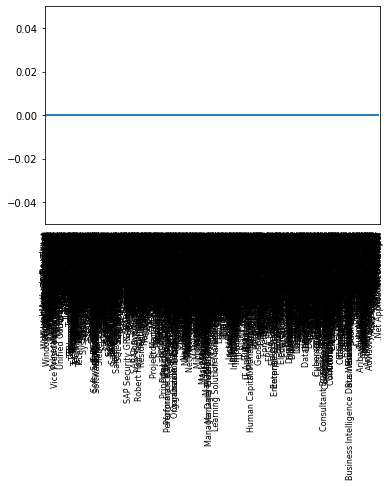

In [80]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Data set
df = tech_skill[['Job_Title']]
df = df.set_index('Job_Title')
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

# Show the graph
plt.show()

# knowledge graph